TypeError: unhashable type: 'numpy.ndarray'

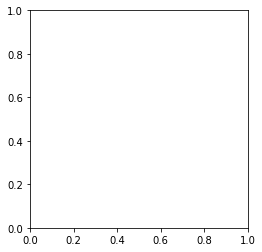

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\vipas\anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\vipas\anaconda3\lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\vipas\anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\vipas\anaconda3\lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#function
#x,y,flags,param are feed from opencv automatically 

def draw_circle(event,x,y,flags,param):
  if event==cv2.EVENT_LBUTTONDOWN:
    cv2.circle(img,(x,y),70,(35,60,78),-1)

#connect function with callback
cv2.namedWindow(winname='mydrawing')

#callback
cv2.setMouseCallback('mydrawing',draw_circle)

#using OpenCV to show the Image
img=np.zeros((512,512,3),np.int8)

while True:
  plt.imshow('mydrawing',img)
  if cv2.waitkey(5) & 0xFF==27:
    break

cv2.destroyAllWindows()

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
def processFrames(self):
        try:
            for img in self.anotations_list:
                img = img.split(';')
                # print(img)
                # ret,imgcv = cap.read()
                if self.video:
                    ret,imgcv = self.cap.read()
                else:
                    imgcv = cv2.imread(os.path.join('../',self.config["dataset"],img[0]))
                result = self.tfnet.return_predict(imgcv)
                print(result)
                imgcv = self.drawBoundingBox(imgcv,result)        
                cv2.imshow('detected objects',imgcv)
                if cv2.waitKey(10) == ord('q'):
                    print('exitting loop')
                    break
        except KeyboardInterrupt:
            cv2.destroyAllWindows()
            print('exitting program') 

In [8]:
def show(im, allobj, S, w, h, cellx, celly):
    for obj in allobj:
        a = obj[5] % S
        b = obj[5] // S
        cx = a + obj[1]
        cy = b + obj[2]
        centerx = cx * cellx
        centery = cy * celly
        ww = obj[3]**2 * w
        hh = obj[4]**2 * h
        cv2.rectangle(im,
            (int(centerx - ww/2), int(centery - hh/2)),
            (int(centerx + ww/2), int(centery + hh/2)),
            (0,0,255), 2)
    cv2.imshow('result', im)
    cv2.waitKey()
    cv2.destroyAllWindows() 
    

In [9]:
def run(self):
        print("VEDIO server starts...")
        self.sock.bind(self.ADDR)
        self.sock.listen(1)
        conn, addr = self.sock.accept()
        print("remote VEDIO client success connected...")
        data = "".encode("utf-8")
        payload_size = struct.calcsize("L")
        cv2.namedWindow('Remote', cv2.WINDOW_AUTOSIZE)
        while True:
            while len(data) < payload_size:
                data += conn.recv(81920)
            packed_size = data[:payload_size]
            data = data[payload_size:]
            msg_size = struct.unpack("L", packed_size)[0]
            while len(data) < msg_size:
                data += conn.recv(81920)
            zframe_data = data[:msg_size]
            data = data[msg_size:]
            frame_data = zlib.decompress(zframe_data)
            frame = pickle.loads(frame_data)
            cv2.imshow('Remote', frame)
            if cv2.waitKey(1) & 0xFF == 27:
                break 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
drawing=False
ex=-1
ey=-1

def draw_rectangle(event,x,y,flags,params):
    global ex,ey,drawing
    
    if event==cv2.EVENT_LBUTTONDOWN:
        drawing=True
        ex,ey=x,y
    elif event==cv2.EVENT_MOUSEMOVE:
        if drawing==True:
            cv2.rectangle(img,(ex,ey),(x,y,),(255,0,255),-1)
    elif event==cv2.EVENT_LBUTTONDOWN:
        drawing=False
        cv2.rectangle(img,(ex,ey),(x,y,),(255,0,255),-1)
    
img=np.zeros((512,512,3),np.int8)

cv2.namedWindow(winname='my_draw')

cv2.setMouseCallback('my_draw',draw_rectangle)

while True:
    plt.imshow('my_draw',img)
    if(cv2.waitKey(5) & 0xFF==ord('q')):
        break

cv2.destroyAllWindows
    


NameError: name 'drae_rectangle' is not defined